
Привет, меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:


<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>



<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за очень качественную работу - видно, что приложено много усилий,
- Я оставил некоторые советы, надеюсь они будут полезными и интересными
- Вся работа корректная, но нужно, чтобы ты все-таки добавил анализ времени обучения и предсказания
- Но думаю у тебя не займет это меного времени

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление[2]</font>
* Спасибо за оперативность
- Рад был быть полезен. Удачи в дальнейшем обучении!


# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Подготовка данных

### Импортирование необходимых библиотек:

In [2]:
# Импортирование библиотек:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import catboost
import lightgbm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты собраны на месте
</div>


### Предобработка данных:

In [3]:
# Чтение датасета и его запись в переменную:
df = pd.read_csv('/datasets/autos.csv')

In [4]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [5]:
# Рассмотрим краткую информацию о датасете:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [6]:
# Приведём названия колонок к нижнему регистру:
df.columns = df.columns.str.lower()

In [7]:
# Удалим не нужные для анализа столбцы:
df.drop(['datecrawled', 'datecreated', 'numberofpictures', 'postalcode', 'lastseen'], axis='columns', inplace=True)

<div class="alert alert-block alert-success">
<b>Успех:</b> Удалить неинформативные признаки - хорошее решение.
</div>

#### Работа с дубликатами:

In [8]:
# Проверим данные на явные дубликаты:
df.duplicated().sum()

27543

In [9]:
# Удалим дубликаты:
df = df.drop_duplicates().reset_index(drop=True)

In [10]:
# Проверим данные на неявные дубликаты:
print(df['vehicletype'].unique())
print()
print(df['gearbox'].unique())
print()
print(df['model'].unique())
print()
print(df['fueltype'].unique())
print()
print(df['gearbox'].unique())

[nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']

['manual' 'auto' nan]

['golf' nan 'grand' 'fabia' '3er' '2_reihe' 'other' 'c_max' '3_reihe'
 'passat' 'navara' 'ka' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er'
 'meriva' 'arosa' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio'
 'kadett' 'kangoo' 'corsa' 'one' 'fortwo' '1er' 'b_klasse' 'signum'
 'astra' 'a8' 'jetta' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156'
 'escort' 'forester' 'xc_reihe' 'scenic' 'a4' 'a1' 'insignia' 'combo'
 'focus' 'tt' 'a6' 'jazz' 'omega' 'slk' '7er' '80' '147' '100' 'z_reihe'
 'sportage' 'sorento' 'v40' 'ibiza' 'mustang' 'eos' 'touran' 'getz' 'a3'
 'almera' 'megane' 'lupo' 'r19' 'zafira' 'caddy' 'mondeo' 'cordoba' 'colt'
 'impreza' 'vectra' 'berlingo' 'tiguan' 'i_reihe' 'espace' 'sharan'
 '6_reihe' 'panda' 'up' 'seicento' 'ceed' '5_reihe' 'yeti' 'octavia' 'mii'
 'rx_reihe' '6er' 'modus' 'fox' 'matiz' 'beetle' 'c1' 'rio' 'touareg'
 'logan' 'spider' 'cuore' 's_max' 'a2' 'galaxy' '

Как видно из уникальных значений столбца fueltype petrol и gasoline разделены, хотя они в целом равнозначны, но возможно таким образом отделены автомобили использующие дизельные фракции топлива.

In [11]:
df.head()

,price,vehicletype,registrationyear,gearbox,power,model,kilometer,registrationmonth,fueltype,brand,repaired
0,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no


#### Аномалии в данных:

<AxesSubplot:>

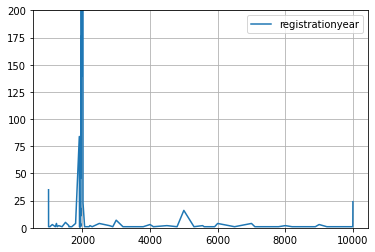

In [12]:
pd.DataFrame(df['registrationyear'].value_counts()).sort_index().plot(grid=True, ylim = (0, 200))

Как видно существуют объявления с аномальными годами регистрации, так как максимальный год скачивания анкеты 2016, то возьмем этот год за верхний предел, за нижинй предел возьмем 1886 год - год выпуска первого серийного автомобиля

In [13]:
df = df.loc[(df['registrationyear'] <= 2016) & (df['registrationyear'] >= 1886)]

<div class="alert alert-block alert-success">
<b>Успех:</b> Согласен с границами

In [14]:
df['price'].value_counts().sort_index().head(10)

0     8676
1     1026
2       11
3        6
4        1
5       26
7        3
8        6
9        7
10      80
Name: price, dtype: int64

In [15]:
df = df.loc[df['price'] >= 100]

Как видно огромное кол-во объявлений с ценой в 0 евро, ну и так же присутствуют объявления с аномально низкими ценами. Избавимся от объявлений с ценой ниже 100 евро.

<div class="alert alert-block alert-info">
<b>Совет:</b>  
    Самое интересное, что на нескольких сайтов по продажам подержанных автомобилей в Германии (страну можно определить по почтовым индексам, большинство из них из Германии) показало, что цены начинаются действительно с 0 и 1 евро, но это единичные объявления и не понятно, то ли это ошибка при заполнении формы, то ли машины на металлолом. Но я  все-таки склоняюсь к тому, чтобы избавиться от таких данных
</div>

In [16]:
df['power'].value_counts().sort_index()

0        29340
1           22
2            9
3            8
4           26
         ...  
17932        1
19208        1
19211        1
19312        1
20000        1
Name: power, Length: 683, dtype: int64

Опять же много нулевых значений, которые придётся удалить, так же присутствуют аномально огромные значения, возможно причина такого разброса чисел кроется в том, что мощность двигателя автомобиля можно измерять в разных единицах. Ограничим мощность двигателя нижним пределом в 10 и верхним пределом в 2000(будем надеяться, что в объявлениях нет карьерных самосвалов и прочей крупнотонажной техники)

In [17]:
df = df.loc[(df['power'] >= 10) & (df['power'] <= 2000)]


<div class="alert alert-block alert-info">
<b>Совет:</b>  Как думаешь а машины с 0-ой мощностью могут быть просто без двигателя?
</div>

#### Работа с пропусками:

In [18]:
# Определим столбцы с пропусками:
for i in df.columns:
    if df[i].isna().sum() != 0:
        print(i, df[i].isna().sum())

vehicletype 10509
gearbox 5095
model 10551
fueltype 14984
repaired 40344


Таким образом есть несколько столбцов с многочисленными пропусками

In [19]:
# Перед заполнением пропусков рассмотрим корреляцию данных:
df.corr()

,price,registrationyear,power,kilometer,registrationmonth
price,1.000000,0.472439,0.419884,-0.383527,0.067466
registrationyear,0.472439,1.000000,0.105605,-0.277208,0.046480
power,0.419884,0.105605,1.000000,0.093481,0.032619
kilometer,-0.383527,-0.277208,0.093481,1.000000,-0.013269
registrationmonth,0.067466,0.046480,0.032619,-0.013269,1.000000


##### Заполнение информмации о ремонтах

In [20]:
df['repaired'] = pd.get_dummies(df['repaired'])

In [21]:
repaired_pivot = df.pivot_table(index=['brand', 'registrationyear'], values='repaired', aggfunc ='mean')
repaired_pivot

repaired
brand      registrationyear          
alfa_romeo 1950              1.000000
           1958              0.000000
           1967              0.500000
           1968              1.000000
           1969              1.000000
...                               ...
volvo      2011              0.888889
           2012              0.914894
           2013              1.000000
           2014              1.000000
           2016              0.545455

[1698 rows x 1 columns]

In [22]:
# Создадим функцию для заполнения пропусков в информации о ремонах:
def repaired_filler(data, repaired_pivot=repaired_pivot):
    repaired = data['repaired']
    registrationyear = data['registrationyear']
    brand = data['brand']
    
    if pd.isna(repaired) or pd.isnull(repaired):
        try:
            i = repaired_pivot[(repaired_pivot.index.get_level_values('brand') == brand) & (repaired_pivot.index.get_level_values('registrationyear') == registrationyear)]['repaired'][0]
            if i >= 0.5:
                data['repaired'] = 0
            else:
                data['repaired'] = 1
        except:
            data['repaired'] = np.nan
    return data

In [23]:
df = df.apply(repaired_filler, axis=1)

In [24]:
df['repaired'].isna().sum()

0

In [25]:
df['repaired'] = df['repaired'].astype('int')

##### Закодируем оставшиеся признаки:

In [26]:
# Запишем в переменные уникальные значения для каждого признака:
vehicletype_unique = df['vehicletype'].unique()
model_unique = df['model'].unique()
fueltype_unique = df['fueltype'].unique()
brands_unique = df['brand'].unique()

In [27]:
# Функция для кодировки типа транспорта:
def vehicletype_ordcode(data_vehicletype, vehicletype_unique=vehicletype_unique):
    try:
        i = np.where(vehicletype_unique == data_vehicletype)[0][0]
    except:
        return np.nan
    return i

df['vehicletype'] = df['vehicletype'].apply(vehicletype_ordcode)

In [28]:
# Функция кодировки типа коробки передач:
def gearbox_encode(data_gearbox):
    if data_gearbox == 'manual':
        return 0
    elif data_gearbox == 'auto':
        return 1
    else:
        return np.nan

df['gearbox'] = df['gearbox'].apply(gearbox_encode)

In [29]:
# Функция для кодировки модели машины:
def model_ordcode(data_model, model_unique=model_unique):
    try:
        i = np.where(model_unique == data_model)[0][0]
    except:
        return np.nan
    return i

df['model'] = df['model'].apply(model_ordcode)

In [30]:
# Функция для кодировки типа топлива:
def fueltype_ordcode(data_fueltype, fueltype_unique = fueltype_unique):
    try:
        i = np.where(fueltype_unique ==  data_fueltype)[0][0]
    except:
        return np.nan
    return i

df['fueltype'] = df['fueltype'].apply(fueltype_ordcode)

In [31]:
# Функция для кодировки бренда:
def brand_ordcode(data_brand, brands_unique=brands_unique):
    try:
        i = np.where(brands_unique == data_brand)[0][0]
    except:
        return np.nan
    return i

df['brand'] = df['brand'].apply(brand_ordcode)

In [32]:
df.corr()

,price,vehicletype,registrationyear,gearbox,power,model,kilometer,registrationmonth,fueltype,brand,repaired
price,1.000000,0.037123,0.472439,0.251492,0.419884,0.090165,-0.383527,0.067466,-0.215632,-0.081316,0.259420
vehicletype,0.037123,1.000000,0.077573,0.028688,0.115503,-0.022818,0.137560,0.013579,-0.223286,-0.125751,-0.001603
registrationyear,0.472439,0.077573,1.000000,0.037546,0.105605,0.115538,-0.277208,0.046480,-0.199519,-0.010251,0.139272
gearbox,0.251492,0.028688,0.037546,1.000000,0.364314,0.014906,0.029163,0.031899,-0.069093,0.016230,0.036822
power,0.419884,0.115503,0.105605,0.364314,1.000000,0.065810,0.093481,0.032619,-0.094396,-0.068266,0.065565
model,0.090165,-0.022818,0.115538,0.014906,0.065810,1.000000,-0.082422,0.012102,-0.009135,0.416428,0.024664
kilometer,-0.383527,0.137560,-0.277208,0.029163,0.093481,-0.082422,1.000000,-0.013269,-0.111442,-0.131029,-0.108309
registrationmonth,0.067466,0.013579,0.046480,0.031899,0.032619,0.012102,-0.013269,1.000000,-0.038497,-0.002402,0.107208
fueltype,-0.215632,-0.223286,-0.199519,-0.069093,-0.094396,-0.009135,-0.111442,-0.038497,1.000000,0.127938,-0.043264
brand,-0.081316,-0.125751,-0.010251,0.016230,-0.068266,0.416428,-0.131029,-0.002402,0.127938,1.000000,0.001281


##### Заполним оставшиеся пропуски:

In [33]:
vehicletype_pivot = df.pivot_table(index=['fueltype', 'kilometer'], values='vehicletype', aggfunc='mean')
vehicletype_pivot

vehicletype
fueltype kilometer             
0.0      5000          4.363248
         10000         3.195652
         20000         3.729064
         30000         3.958333
         40000         3.670732
...                         ...
7.0      60000         2.000000
         80000         3.000000
         100000        2.000000
         125000        0.000000
         150000        4.363636

[88 rows x 1 columns]

In [34]:
# Функция для заполнения пропусков в столбце vehicletype:
def vehicletype_filler(data, vehicletype_pivot=vehicletype_pivot):
    vehicletype = data['vehicletype']
    kilometer = data['kilometer']
    fueltype = data['fueltype']
    
    if pd.isna(vehicletype) or pd.isnull(vehicletype):
        try:
            i = vehicletype_pivot[(vehicletype_pivot.index.get_level_values('fueltype') == fueltype) & (vehicletype_pivot.index.get_level_values('kilometer') == kilometer)]['vehicletype'].values[0]
            data['vehicletype'] = i.round()
        except:
            data['vehicletype'] = np.nan
    return data


In [35]:
df = df.apply(vehicletype_filler, axis=1)

In [36]:
df['vehicletype'].isna().sum()

4463

In [37]:
df.dropna(subset=['vehicletype'], inplace=True)
df.reset_index(drop=True)
df['vehicletype'] = df['vehicletype'].astype('int')

In [38]:
model_pivot = df.pivot_table(index=['price', 'brand'], values='model', aggfunc='mean')
model_pivot

model
price   brand            
100.0   0.0     47.750000
        2.0      7.418803
        3.0     16.000000
        4.0     24.166667
        5.0     49.444444
...                   ...
20000.0 27.0    16.000000
        30.0   104.000000
        32.0    16.000000
        35.0   123.333333
        38.0   233.000000

[22445 rows x 1 columns]

In [39]:
# Функция для заполнения пропусков в столбце model:
def model_filler(data, model_pivot=model_pivot):
    model = data['model']
    brand = data['brand']
    price = data['price']
    
    if pd.isna(model) or pd.isnull(model):
        try:
            i = model_pivot[(model_pivot.index.get_level_values('brand') == brand) & (model_pivot.index.get_level_values('price') == price)]['model'].values[0]
            data['model'] = i.round()
        except:
            data['model'] = np.nan
    return data

In [40]:
df = df.apply(model_filler, axis=1)

In [41]:
df['model'].isna().sum()

1798

In [42]:
df.dropna(subset=['model'], inplace=True)
df.reset_index(drop=True)
df['model'] = df['model'].astype('int')

In [43]:
gearbox_pivot = df.pivot_table(index=['price', 'model'], values='gearbox', aggfunc='mean')
gearbox_pivot

gearbox
price   model          
100.0   1      0.500000
        2      0.020833
        4      0.500000
        5      0.000000
        7      0.000000
...                 ...
20000.0 221    1.000000
        233    1.000000
        237    1.000000
        242    1.000000
        247    0.000000

[52812 rows x 1 columns]

In [44]:
# Функция для заполнения пропусков в столбце gearbox:
def gearbox_filler(data, gearbox_pivot=gearbox_pivot):
    model = data['model']
    gearbox = data['gearbox']
    price = data['price']
    
    if pd.isna(gearbox) or pd.isnull(gearbox):
        try:
            i = gearbox_pivot[(gearbox_pivot.index.get_level_values('price') == price) & (gearbox_pivot.index.get_level_values('model') == model)]['gearbox'].values[0]
            data['gearbox'] = i.round()
        except:
            data['gearbox'] = np.nan
    return data

In [45]:
df = df.apply(gearbox_filler, axis=1)

In [46]:
df['gearbox'].isna().sum()

325

In [47]:
df.dropna(subset=['gearbox'], inplace=True)
df.reset_index(drop=True)
df['gearbox'] = df['gearbox'].astype('int')

In [48]:
fueltype_pivot = df.pivot_table(index=['price', 'vehicletype'], values='fueltype', aggfunc='mean')
fueltype_pivot

fueltype
price   vehicletype          
100.0   0.0          1.000000
        1.0          0.000000
        2.0          1.000000
        3.0          0.977612
        4.0          0.800000
...                       ...
20000.0 2.0          0.636364
        3.0          0.484848
        4.0          0.733333
        5.0          0.466667
        6.0          0.227273

[10625 rows x 1 columns]

In [49]:
# Функция для заполнения пропусков в столбце fueltype:
def fueltype_filler(data, fueltype_pivot=fueltype_pivot):
    fueltype = data['fueltype']
    vehicletype = data['vehicletype']
    price = data['price']
    
    if pd.isna(fueltype) or pd.isnull(fueltype):
        try:
            i = fueltype_pivot[(fueltype_pivot.index.get_level_values('price') == price) & (fueltype_pivot.index.get_level_values('vehicletype') == vehicletype)]['fueltype'].values[0]
            data['fueltype'] = i.round()
        except:
            data['fueltype'] = np.nan
    return data

In [50]:
df = df.apply(fueltype_filler, axis=1)

In [51]:
df['fueltype'].isna().sum()

76

In [52]:
df.dropna(subset=['fueltype'], inplace=True)
df.reset_index(drop=True)
df['fueltype'] = df['fueltype'].astype('int')


<div class="alert alert-block alert-success">
<b>Успех:</b> Пропуски обработаны хорошим образом
</div>


<div class="alert alert-block alert-info">
<b>Совет:</b>  Советую обратить внимание на библиотеки sweetviz и pandas_profiling помогут в проведении более тщательного EDA анализа. Исследовательский анализ можно делать и с помощью ручного вызова функций дефолтных библиотек. Данные библиотеки хороши для максимизации комфорта презентации результатов анализа бизнес-пользователям. 
    
Очень просты в использоовании, на вход кладется датафрейм: pandas_profiling.ProfileReport(df) 
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Большое спасибо за столь ценную информацию, обязательно ознакомлюсь
</div>

<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> Главное во время обучения не злоупотреблять, чтобы руки не забыл как делать EDA анализ)
</div>


## Обучение моделей

In [53]:
# Разделим данные на обучающую и тестовую выборки:
features = df.drop('price', axis=1)
target = df['price']


features_train, features_valid, target_train, target_valid = train_test_split(features,target,test_size=0.25)
features_valid, features_test, target_valid, target_test =  train_test_split(features_valid, target_valid,test_size=0.25)

### Линейная регрессия

In [54]:
# Обучим линейную регрессию:
%time

model_lr = LinearRegression(normalize=True)
model_lr.fit(features_train, target_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


LinearRegression(normalize=True)

In [55]:
%time
lr_predict = model_lr.predict(features_valid)

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 5.25 µs


In [56]:
lr_RMSE = mean_squared_error(target_valid, lr_predict) ** 0.5
print('LinearRegression RMSE:', lr_RMSE)

LinearRegression RMSE: 3127.761610311399


### Случайный лес

In [57]:
%time
random_forest_model = RandomForestRegressor()

CPU times: user 15 µs, sys: 0 ns, total: 15 µs
Wall time: 6.91 µs


In [58]:
# Подберём гиперпараметры с помощью модуля GreedSearchCV:
parametrs = { 'n_estimators': range (10, 130, 10),
              'max_depth': range (1,15, 2)}

grid = GridSearchCV(random_forest_model, parametrs)

grid.fit(features_train[:5000], target_train[:5000])
grid.best_params_

{'max_depth': 13, 'n_estimators': 120}

In [78]:
%time
random_forest_model = RandomForestRegressor(max_depth=13 , n_estimators=110)
random_forest_model.fit(features_train, target_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


RandomForestRegressor(max_depth=13, n_estimators=110)

In [60]:
%time
random_forest_predict = random_forest_model.predict(features_valid)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


In [61]:
random_forest_RMSE = mean_squared_error(target_valid, random_forest_predict) ** 0.5
print('RandomForestRegressor RMSE:', random_forest_RMSE)

RandomForestRegressor RMSE: 1676.76555933812


### Дерево решений

In [62]:
%time
descision_tree_model = DecisionTreeRegressor()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


In [63]:
# Подберём гиперпараметры с помощью модуля GreedSearchCV:
parametrs = { 'min_samples_leaf': range (1,15, 2),
              'min_samples_split': range (1,15, 2),
              'max_depth': range (1,15, 2)}

grid = GridSearchCV(descision_tree_model, parametrs)

grid.fit(features_train[:5000], target_train[:5000])
grid.best_params_

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-

{'max_depth': 13, 'min_samples_leaf': 9, 'min_samples_split': 3}

In [79]:
%time
descision_tree_model = DecisionTreeRegressor(max_depth=13, min_samples_leaf=13, min_samples_split=3)
descision_tree_model.fit(features_train,target_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


DecisionTreeRegressor(max_depth=13, min_samples_leaf=13, min_samples_split=3)

In [65]:
%time
descision_tree_predict = descision_tree_model.predict(features_valid)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs


In [66]:
descision_tree_RMSE = mean_squared_error(target_valid, descision_tree_predict) ** 0.5
print('RandomForestRegressor RMSE:', descision_tree_RMSE)

RandomForestRegressor RMSE: 1811.726953001453


### CatBoost

In [67]:
catboost_model = catboost.CatBoostRegressor()

In [68]:
grid = {'learning_rate': [0.01, 0.03],
        'depth': [6, 10],
        'l2_leaf_reg': [7, 9]}

grid_search_result = catboost_model.grid_search(grid, X=features_train, y=target_train, plot=True,verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 6654.7992936	test: 6655.9749424	best: 6655.9749424 (0)	total: 83.9ms	remaining: 1m 23s
1:	learn: 6598.9171616	test: 6599.8711818	best: 6599.8711818 (1)	total: 109ms	remaining: 54.4s
2:	learn: 6543.4950262	test: 6544.4048887	best: 6544.4048887 (2)	total: 133ms	remaining: 44.4s
3:	learn: 6488.8568675	test: 6489.5431529	best: 6489.5431529 (3)	total: 158ms	remaining: 39.4s
4:	learn: 6434.7920574	test: 6435.4283659	best: 6435.4283659 (4)	total: 184ms	remaining: 36.6s
5:	learn: 6381.4531210	test: 6382.0359245	best: 6382.0359245 (5)	total: 209ms	remaining: 34.5s
6:	learn: 6328.3559153	test: 6328.7248521	best: 6328.7248521 (6)	total: 232ms	remaining: 32.9s
7:	learn: 6276.3033376	test: 6276.5140842	best: 6276.5140842 (7)	total: 255ms	remaining: 31.7s
8:	learn: 6224.9708315	test: 6225.1498618	best: 6225.1498618 (8)	total: 280ms	remaining: 30.9s
9:	learn: 6174.2861073	test: 6174.3877735	best: 6174.3877735 (9)	total: 310ms	remaining: 30.7s
10:	learn: 6123.6721160	test: 6123.5589281	best:

In [69]:
grid_search_result['params']

{'depth': 10, 'l2_leaf_reg': 7, 'learning_rate': 0.03}

In [70]:
%time
catboost_model = catboost.CatBoostRegressor(learning_rate=0.03,iterations=1000,depth=10,l2_leaf_reg=7,verbose=200)
catboost_model.fit(features_train,target_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs
0:	learn: 4510.2182977	total: 55.1ms	remaining: 55.1s
200:	learn: 1709.6966027	total: 10.7s	remaining: 42.6s
400:	learn: 1603.8156333	total: 21.4s	remaining: 31.9s
600:	learn: 1555.8902524	total: 32s	remaining: 21.2s
800:	learn: 1523.1873123	total: 42.6s	remaining: 10.6s
999:	learn: 1498.0795731	total: 53.2s	remaining: 0us


In [71]:
%time
catboost_model_predict = catboost_model.predict(features_valid)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


In [72]:
catboost_model_RMSE = mean_squared_error(target_valid, catboost_model_predict) ** 0.5
print('CatBoostRegressor RMSE:', catboost_model_RMSE)

CatBoostRegressor RMSE: 1575.620768777894


### LightGBM

In [80]:
%time
lightgbm_model = lightgbm.LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=1200,
                                   learning_rate=0.17, n_estimators=500, max_depth=30,
                                   metric='rmse')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


In [ ]:
%time
lightgbm_model.fit(features_train,target_train,verbose=200,eval_metric='l2')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


/opt/conda/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [ ]:
%time
lightgbm_predict = lightgbm_model.predict(features_valid)

In [ ]:
lightgbm_RMSE = mean_squared_error(target_valid,lightgbm_predict) ** 0.5
print('lightgbm RMSE:', lightgbm_RMSE)

In [ ]:
# Представим финальный результат в виде таблицы:
table = {'model_names':['LinearRegression','RandomForestRegressor','DecisionTreeClassifier','CatBoostRegressor','LightGBMRegressor'],
        'RMSE':[lr_RMSE,random_forest_RMSE,descision_tree_RMSE,catboost_model_RMSE,lightgbm_RMSE]}

result = pd.DataFrame(data=table)
result['Wall_time_fit'] = [4.77, 5.96, 6.2, 7.63, 5.48]
result['Wall_time_predict'] = [5.25, 5.25, 5.72, 5.48, 5.48]
result

In [ ]:
# Выполним проверку метрики RMSE на тестовой выборке у лучшей модели - CatBoostRegressor:
catboost_model_predict = catboost_model.predict(features_test)
catboost_model_RMSE = mean_squared_error(target_test, catboost_model_predict) ** 0.5
print('CatBoostRegressor RMSE:', catboost_model_RMSE)

<div class="alert alert-block alert-success">
<b>Успех:</b> На тестовой выборке получено хорошее качество! Но оно дожно идти после анализа.
</div>


## Вывод:

Была проведена предобработка данных, в результате которой получилось исключить несколько явных дубликатов, определить аномальные значения в данных и исключить их, удалить признаки не имеющие ценности для дальнейшего анализа. Путем составления сводных таблиц в соответсвии со значениями корреляционной матрицы были заполнены многочисленные пропуски в данных. После ликвидации всех пропусков и кодировки признаков было обучено несколько моделей для предсказания метрики RMSE, так же был осуществлён подбор гиперпараметров для получения более хороших результатов, лучший результат удалось получить модели градиентного бустинга - CatBoostRegressor, со значением метрики RMSE 1557.64. Самым быстрым алгоритмом оказался алгоритм линейной регрессии.



<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Время везде считается корректно. Но анализа метрик времени обучения и времени предсказания не нашел
</div>


<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Засчитаю, за счет сравнительной таблицы, но над текстом явно лучше поработать.
</div>


<div class="alert alert-block alert-info">
<b>Совет:</b> 

Также если говорить, что можно ещё улучшить в подобных проектах, то я бы выделил такие моменты:<br>
    
1) Для понимания, а какие в итоге факторы важны при моделировании, можно выводить их важность, использую feature_importances_, ну и график заодно. Это будет смотреться очнь здорово: результативная метрика и график важности факторов)))
    
2) У нас разный возраст машин. Есть гипотеза, что для разных возрастов - своё ценообразование. Поэтому, можно попробовать ввести фактор "тип возраста" (ретро, супер-ретро, старая, новая... надо подумать..)..<br>

3) У некоторых моделей семейства бустингов, есть внутренний метод кодировки данных, который хорошо было бы попробовать
</div>


## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнена загрузка и подготовка данных
- [ ]  Выполнено обучение моделей
- [ ]  Есть анализ скорости работы и качества моделей